In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
data = pd.read_csv("kyphosis.csv")
data.head()

# Contains several features
#     Kyphosis - whether or not this condition was present after surgery
#     Age - the age of the person in months
#     Number - the number of vertebrae 
#     Start - where the surgery was operated on

,Kyphosis,Age,Number,Start
0,absent,71,3,5
1,absent,158,3,14
2,present,128,4,5
3,absent,2,5,1
4,absent,1,4,15


In [3]:
# Only 81 data? This seems to be very small for a ML problem
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 4 columns):
Kyphosis    81 non-null object
Age         81 non-null int64
Number      81 non-null int64
Start       81 non-null int64
dtypes: int64(3), object(1)
memory usage: 2.7+ KB


In [4]:
data.describe()

,Age,Number,Start
count,81.000000,81.000000,81.000000
mean,83.654321,4.049383,11.493827
std,58.104251,1.619423,4.883962
min,1.000000,2.000000,1.000000
25%,26.000000,3.000000,9.000000
50%,87.000000,4.000000,13.000000
75%,130.000000,5.000000,16.000000
max,206.000000,10.000000,18.000000


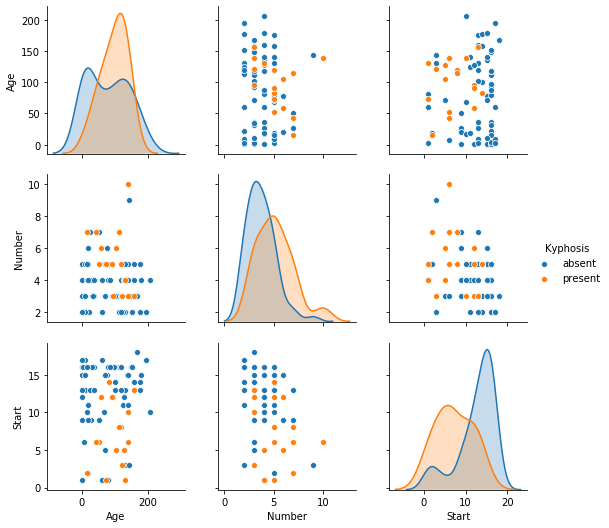

In [5]:
sns.pairplot(data, hue="Kyphosis")

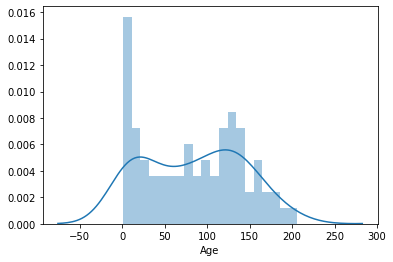

In [6]:
sns.distplot(data['Age'], bins=20)

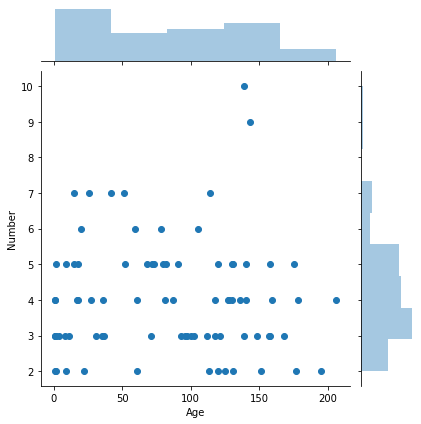

In [7]:
sns.jointplot(x='Age', y='Number', data=data)

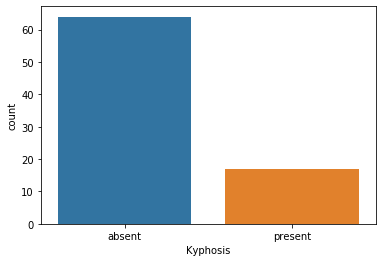

In [8]:
# This count plot shows that this data is very imbalanced!
# There is more data with absent class than present class
# These two classes need to be equal otherwise, the model prediction will be biased
sns.countplot(x='Kyphosis', data=data)

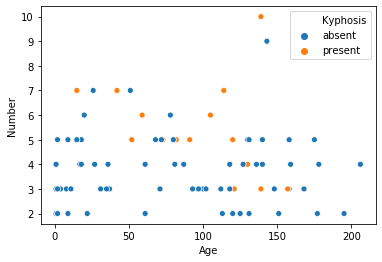

In [9]:
sns.scatterplot(x='Age',y='Number',data=data,hue="Kyphosis")

In [10]:
from sklearn.model_selection import train_test_split

X = data.drop("Kyphosis", axis=1)
y = data['Kyphosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3, stratify=y)

In [11]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.89      0.85      0.87        20
     present       0.50      0.60      0.55         5

    accuracy                           0.80        25
   macro avg       0.70      0.72      0.71        25
weighted avg       0.82      0.80      0.81        25

[[17  3]
 [ 2  3]]
0.8


In [13]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

      absent       0.86      0.90      0.88        20
     present       0.50      0.40      0.44         5

    accuracy                           0.80        25
   macro avg       0.68      0.65      0.66        25
weighted avg       0.79      0.80      0.79        25

[[18  2]
 [ 3  2]]
0.8


In [ ]:
# This dataset is imbalanced and small in size.
# 80% accuracy on this data is fine, but it can be improved further
# if the dataset contained more data and balanced classes